Problem - 1: Perform a classification task with knn from scratch.
1. Load the Dataset:
• Read the dataset into a pandas DataFrame.
• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).
2. Handle Missing Data:
• Handle any missing values appropriately, either by dropping or imputing them based on the data.
3. Feature Engineering:
• Separate the feature matrix (X) and target variable (y).
• Perform a train - test split from scratch using a 70% − 30% ratio.
4. Implement KNN:
• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
• Compute distances using Euclidean distance.
• Write functions for:
– Predicting the class for a single query.
– Predicting classes for all test samples.
• Evaluate the performance using accuracy.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

In [ ]:
#Load the dataset
df=pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv")

In [ ]:
#Display first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Find data type of each column in the dataset
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
#Check missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#Statistics summary of dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are no missing values in the given datset.

In [34]:
#Seperate features(X) and (y)
X=df.drop(columns=['Outcome']).values #Convert features to NumPy array
y=df['Outcome'].values #Convert target to NumPy array
#Define a function for train-test split from scratch
def train_test_split_scratch(X,y,test_size=0.3,random_seed=42):
  """
  Splits dataset into train and test sets.
  Argumnets:
  X: np.ndrray
     Feature matrix
  y: np.ndrray
     Target array
  test_size:float
      Proportion of datset to include in test split(0<test_size<1)
  random_seed: int
      Seed for reproductibility
  Returns:
  X_train,X_test,y_train,y_test : np.drray
      Training and testing splits of features and target
  """
  np.random.seed(random_seed)
  indices=np.arange(X.shape[0])
  np.random.shuffle(indices)
  test_split_size=int(len(X)*test_size)
  test_indices=indices[:test_split_size]
  train_indices=indices[test_split_size:]
  X_train,X_test=X[train_indices],X[test_indices]
  y_train,y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train,y_test
#Perform the train-test split
X_train,X_test,y_train,y_test=train_test_split_scratch(X,y,test_size=0.3)
#Output shapes to verify
print("Shpae of X_train:",X_train.shape)
print("Shpae of X_test:",X_test.shape)
print("Shpae of y_train:",y_train.shape)
print("Shpae of y_test:",y_test.shape)

Shpae of X_train: (538, 8)
Shpae of X_test: (230, 8)
Shpae of y_train: (538,)
Shpae of y_test: (230,)


In [35]:
def euclidean_distance(point1,point2):
  """
  Calculate the Euclidean distance between two points in n-dimensional space.
  Arguments:
  point1 : np.ndarray
  The first point as a numpy array.
  point2 : np.ndarray
  The second point as a numpy array.
  Returns:
  float
  The Euclidean distance between the two points.
  Raises:
  ValueError: If the input points do not have the same dimensionality.
  """
  # Check if the points are of the same dimension
  if point1.shape!=point2.shape:
    raise ValueError("Points must have same dimension to calculate Euclidean distance.")
  #Calculate Euclidean distance
  return np.sqrt(np.sum(point1-point2)**2)

In [36]:
#Function for KNN prediction for a single query
def knn_predict_single(query,X_train,y_train,k=3):
  """
  Predict the class label for a single query using the K-nearest neighbors algorithm.
  Arguments:
  query : np.ndarray
  The query point for which the prediction is to be made.
  X_train : np.ndarray
  The training feature matrix.
  y_train : np.ndarray
  The training labels.
  k : int, optional
  The number of nearest neighbors to consider (default is 3).
  Returns:
  int
  The predicted class label for the query.
  """
  distances=[euclidean_distance(query,x)for x in X_train]
  sorted_indices=np.argsort(distances)
  nearest_indices=sorted_indices[:k]
  nearest_labels=y_train[nearest_indices]
  prediction=np.bincount(nearest_labels).argmax()
  return prediction

In [37]:
#Function to test KNN for all test samples
def knn_predict(X_test,X_train,y_train,k=3):
  """
  Predict the class labels for all test samples using the K-nearest neighbors algorithm.
  Arguments:
  X_test : np.ndarray
  The test feature matrix.
  X_train : np.ndarray
  The training feature matrix.
  y_train : np.ndarray
  The training labels.
  k : int, optional
  The number of nearest neighbors to consider (default is 3).
  Returns:
  np.ndarray
  An array of predicted class labels for the test samples.
  """
  predictions=[knn_predict_single(x,X_train,y_train,k) for x in X_test]
  return np.array(predictions)

In [38]:
#Function to compute accuracy of predictions
def compute_accuracy(y_true,y_pred):
  """
  Compute the accuracy of predictions.
  Arguments:
  y_true : np.ndarray ; The true labels.
  y_pred : np.ndarray; The predicted labels.
  Returns:
  float : The accuracy as a percentage (0 to 100).
  """
  correct_predictions=np.sum(y_true==y_pred)
  total_predictions=len(y_true)
  accuracy=(correct_predictions/total_predictions)*100
  return accuracy
  #Perform prediction on the entire test set
try:
  #make predictions on entire test set
  predictions=knn_predict(X_test,X_train,y_train,k=3)
  #Compute the accuracy
  accuracy=compute_accuracy(y_test,predictions)
  #Print the accuracy
  print(f"Accuracy of KNN model on test set:{accuracy:.2f}%")
except Exception as e:
  print(f"An unexpected error occurred during prediction or accuracy computation:{e}")

Accuracy of KNN model on test set:61.74%


Problem - 2 - Experimentation:
1. Repeat the Classification Task:
• Scale the Feature matrix X.
• Use the scaled data for training and testing the kNN Classifier.
• Record the results.
2. Comparative Analysis: Compare the Results -
• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.
• Discuss:
– How scaling impacted the KNN performance.
– The reason for any observed changes in accuracy.

In [40]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
#Function to calculate accuracy for scaled dataset
def compute_accuracy(y_true,y_pred):
  correct_predictions=np.sum(y_true == y_pred)
  total_predictions=len(y_true)
  return (correct_predictions/total_predictions)*100
print("Evaluation of KNN model on the scaled dataset:")
predictions_scaled=knn_predict(X_test_scaled,X_train_scaled,y_train,k=3)
accuracy_scaled=compute_accuracy(y_test,predictions_scaled)
print(f"Accuracy of KNN model on scaled dataset :{accuracy_scaled:.2f}%")

Evaluation of KNN model on the scaled dataset:
Accuracy of KNN model on scaled dataset :65.65%


The accuracy of KNN model increased after scaling the dataset as KNN depends on distance metrics. So, scaling standardized the ranges of features to ensure equal contributiion which prevents bias from large values, provides numerical stability and enhances feature balance.

Problem - 3 - Experimentation with k:
1. Vary the number of neighbors - k:
• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:
– Accuracy.
– Time taken to make predictions.
2. Visualize the Results:
• Plot the following graphs:
– k vs. Accuracy for original and scaled datasets.
– k vs. Time Taken for original and scaled datasets.
3. Analyze and Discuss:
• Discuss how the choice of k affects the accuracy and computational cost.
• Identify the optimal k based on your analysis.

Acuuracy for k=1: 60.00%
Scaled Accuracy for k=1: 60.87%
Time Acuuracy for k=1: 60.00%
Scaled Time Accuracy for k=1: 60.87%
Acuuracy for k=2: 63.91%
Scaled Accuracy for k=2: 67.39%
Time Acuuracy for k=2: 63.91%
Scaled Time Accuracy for k=2: 67.39%
Acuuracy for k=3: 61.74%
Scaled Accuracy for k=3: 65.65%
Time Acuuracy for k=3: 61.74%
Scaled Time Accuracy for k=3: 65.65%
Acuuracy for k=4: 66.96%
Scaled Accuracy for k=4: 66.09%
Time Acuuracy for k=4: 66.96%
Scaled Time Accuracy for k=4: 66.09%
Acuuracy for k=5: 64.35%
Scaled Accuracy for k=5: 66.09%
Time Acuuracy for k=5: 64.35%
Scaled Time Accuracy for k=5: 66.09%
Acuuracy for k=6: 64.35%
Scaled Accuracy for k=6: 69.57%
Time Acuuracy for k=6: 64.35%
Scaled Time Accuracy for k=6: 69.57%
Acuuracy for k=7: 65.65%
Scaled Accuracy for k=7: 67.83%
Time Acuuracy for k=7: 65.65%
Scaled Time Accuracy for k=7: 67.83%
Acuuracy for k=8: 66.52%
Scaled Accuracy for k=8: 69.13%
Time Acuuracy for k=8: 66.52%
Scaled Time Accuracy for k=8: 69.13%
Acuuracy

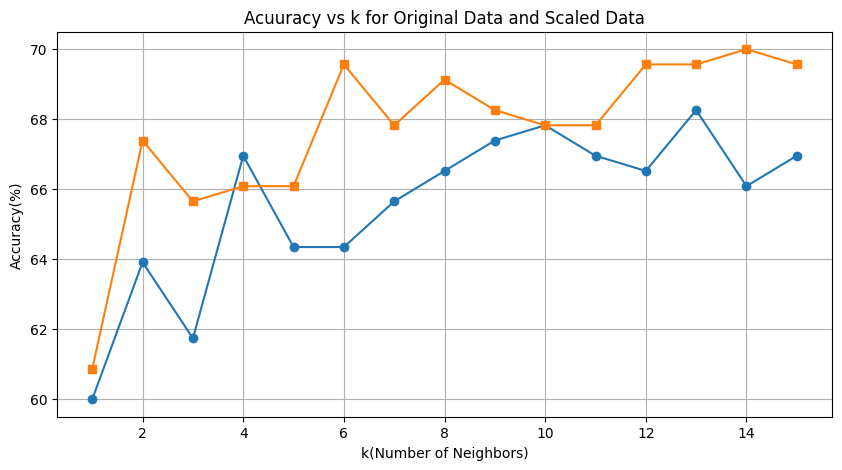

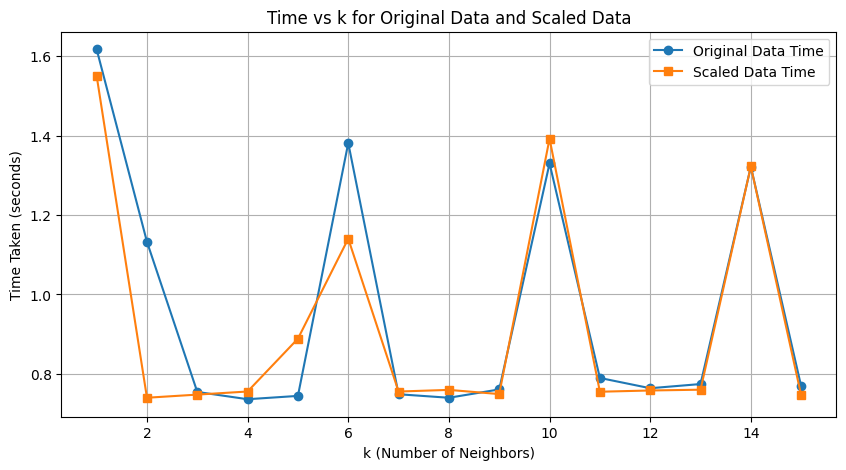

Experiment completed.Check the plot for accuracy trend.


In [55]:
#Function to test KNN on different values of k and plot the accuracies
def experiment_knn_k_values(X_train,y_train,X_test,y_test,k_values):
  """
  Run KNN predictions for different values of k and plot the accuracies.
  Arguments:
  X_train : np.ndarray
    The training feature matrix.
  y_train : np.ndarray
    The training labels.
  X_test : np.ndarray
  The test feature matrix.
  y_test : np.ndarray
    The test labels.
  k_values : list of int
    A list of k values to experiment with.
  Returns:
  dict
    A dictionarywith k values as keys and their corresponding accuracis as values.\
  """
  accuracies={}
  scaled_accuracies={}
  times=[]
  scaled_times=[]
  for k in k_values:
    #Make predictions using the current value of k
    predictions=knn_predict(X_test,X_train,y_train,k)
    #compute the accuracy
    accuracy=compute_accuracy(y_test,predictions)
    accuracies[k]=accuracy
    print(f"Acuuracy for k={k}: {accuracy:.2f}%")
    scaled_predictions=knn_predict(X_test_scaled,X_train_scaled,y_train,k)
    scaled_accuracy=compute_accuracy(y_test,scaled_predictions)
    scaled_accuracies[k]=scaled_accuracy
    print(f"Scaled Accuracy for k={k}: {scaled_accuracy:.2f}%")

    start_time=time.time()
    predictions=knn_predict(X_test,X_train,y_train,k)
    end_time=time.time()
    times.append(end_time-start_time)
    accuracy=compute_accuracy(y_test,predictions)
    print(f"Time Acuuracy for k={k}: {accuracy:.2f}%")

    scaled_start_time=time.time()
    scaled_predictions=knn_predict(X_test_scaled,X_train_scaled,y_train,k)
    scaled_end_time=time.time()
    scaled_times.append(scaled_end_time-scaled_start_time)
    scaled_accuracy=compute_accuracy(y_test,scaled_predictions)
    print(f"Scaled Time Accuracy for k={k}: {scaled_accuracy:.2f}%")
  #Plot the accuracies
  plt.figure(figsize=(10,5))
  plt.plot(k_values,list(accuracies.values()),marker='o',label="Original Data")
  plt.plot(k_values,list(scaled_accuracies.values()),marker='s',label="Scaled Data")
  plt.xlabel('k(Number of Neighbors)')
  plt.ylabel('Accuracy(%)')
  plt.title('Acuuracy vs k for Original Data and Scaled Data')
  plt.grid(True)
  plt.show()
  # Plot time vs k
  plt.figure(figsize=(10, 5))
  plt.plot(k_values, times, marker='o', label='Original Data Time')
  plt.plot(k_values, scaled_times, marker='s', label='Scaled Data Time')
  plt.xlabel('k (Number of Neighbors)')
  plt.ylabel('Time Taken (seconds)')
  plt.title('Time vs k for Original Data and Scaled Data')
  plt.legend()
  plt.grid(True)
  plt.show()
  return accuracies,times,scaled_accuracies,scaled_times
#Deifne the range of k values to experiment with
k_values=range(1,16)
#Run the experiment
try:
  accuracies=experiment_knn_k_values(X_train,y_train,X_test,y_test,k_values)
  print("Experiment completed.Check the plot for accuracy trend.")
except Exception as e:
  print(f"An unexpected error occurred during the experiment:{e}")

When the value of k is low, the acuuracy is realtively lower but as k increases and ranges around 6 to 10, accuracy is much more stable. However, if the value of k is high,acuuracy starts to decrease slightly.
Acoording to the results, the optimal value of k is 13 in the case of original dataset and 14 in that of scaled dataset.